In [2]:
import seaborn as sns
from sims import *
import pandas as pd
import matplotlib.pyplot as plt

# ATE

In [21]:
linear = pd.read_pickle("./data/sim_results_covarfixed_hetero.pkl")
sig = pd.read_pickle("./data/sim_results_covarfixed_sig.pkl")
kcl = pd.read_pickle("./data/sim_results_covarfixed_nm.pkl")

FileNotFoundError: [Errno 2] No such file or directory: './data/sim_results_covarfixed_lin.pkl'

In [ ]:
alpha = .05

sim_pvals = pd.concat([linear, sig, kcl], axis=0)

sim_pvals_long = pd.melt(sim_pvals, id_vars=["Simulation", "#Samples", "Dimensionality", "Balance", "Effect Size", "i"],
                        value_vars=["cMANOVA", "CoDITE", "cDCorr", "DCorr", "Causal cMANOVA", "Causal CoDITE", "Causal cDCorr", "Causal DCorr"],
                        var_name="Statistic", value_name="p-value")

sim_pvals_long["p-value"] = sim_pvals_long["p-value"].fillna(np.nan)
sim_pvals_long["Statistical Power"] = np.where(~np.isnan(sim_pvals_long["p-value"]),
                                     (sim_pvals_long["p-value"] < alpha).astype(float), 
                                     np.nan)
sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("CoDITE", "KernelCDTest")
sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("Causal CoDITE", "Causal KernelCDTest")
sim_pvals_long.tail()

In [22]:

sim_powers = sim_pvals_long.groupby(
    ["Simulation", "Dimensionality", "Balance", "Effect Size", "Statistic"]
).agg({"Statistical Power" : np.mean}).reset_index()
sim_powers = sim_powers[sim_powers["Statistic"] != "Causal KernelCDTest"]
sim_powers.head()

,Simulation,Dimensionality,Balance,Effect Size,Statistic,Statistical Power
0,Function,10,0.4,0.0,Causal DCorr,0.235
2,Function,10,0.4,0.0,Causal cDCorr,0.065
3,Function,10,0.4,0.0,Causal cMANOVA,NaN
4,Function,10,0.4,0.0,DCorr,1.000
5,Function,10,0.4,0.0,KernelCDTest,0.025


In [23]:
sim_powers["Setting"] = "p=" + sim_powers["Dimensionality"].astype(str) + ", Balance=" + sim_powers["Balance"].astype(str)
sim_powers

,Simulation,Dimensionality,Balance,Effect Size,Statistic,Statistical Power,Setting
0,Function,10,0.4,0.0,Causal DCorr,0.235,"p=10, Balance=0.4"
2,Function,10,0.4,0.0,Causal cDCorr,0.065,"p=10, Balance=0.4"
3,Function,10,0.4,0.0,Causal cMANOVA,NaN,"p=10, Balance=0.4"
4,Function,10,0.4,0.0,DCorr,1.000,"p=10, Balance=0.4"
5,Function,10,0.4,0.0,KernelCDTest,0.025,"p=10, Balance=0.4"
...,...,...,...,...,...,...,...
1595,Sigmoidal,101,0.8,1.0,Causal cMANOVA,NaN,"p=101, Balance=0.8"
1596,Sigmoidal,101,0.8,1.0,DCorr,0.040,"p=101, Balance=0.8"
1597,Sigmoidal,101,0.8,1.0,KernelCDTest,0.990,"p=101, Balance=0.8"
1598,Sigmoidal,101,0.8,1.0,cDCorr,1.000,"p=101, Balance=0.8"


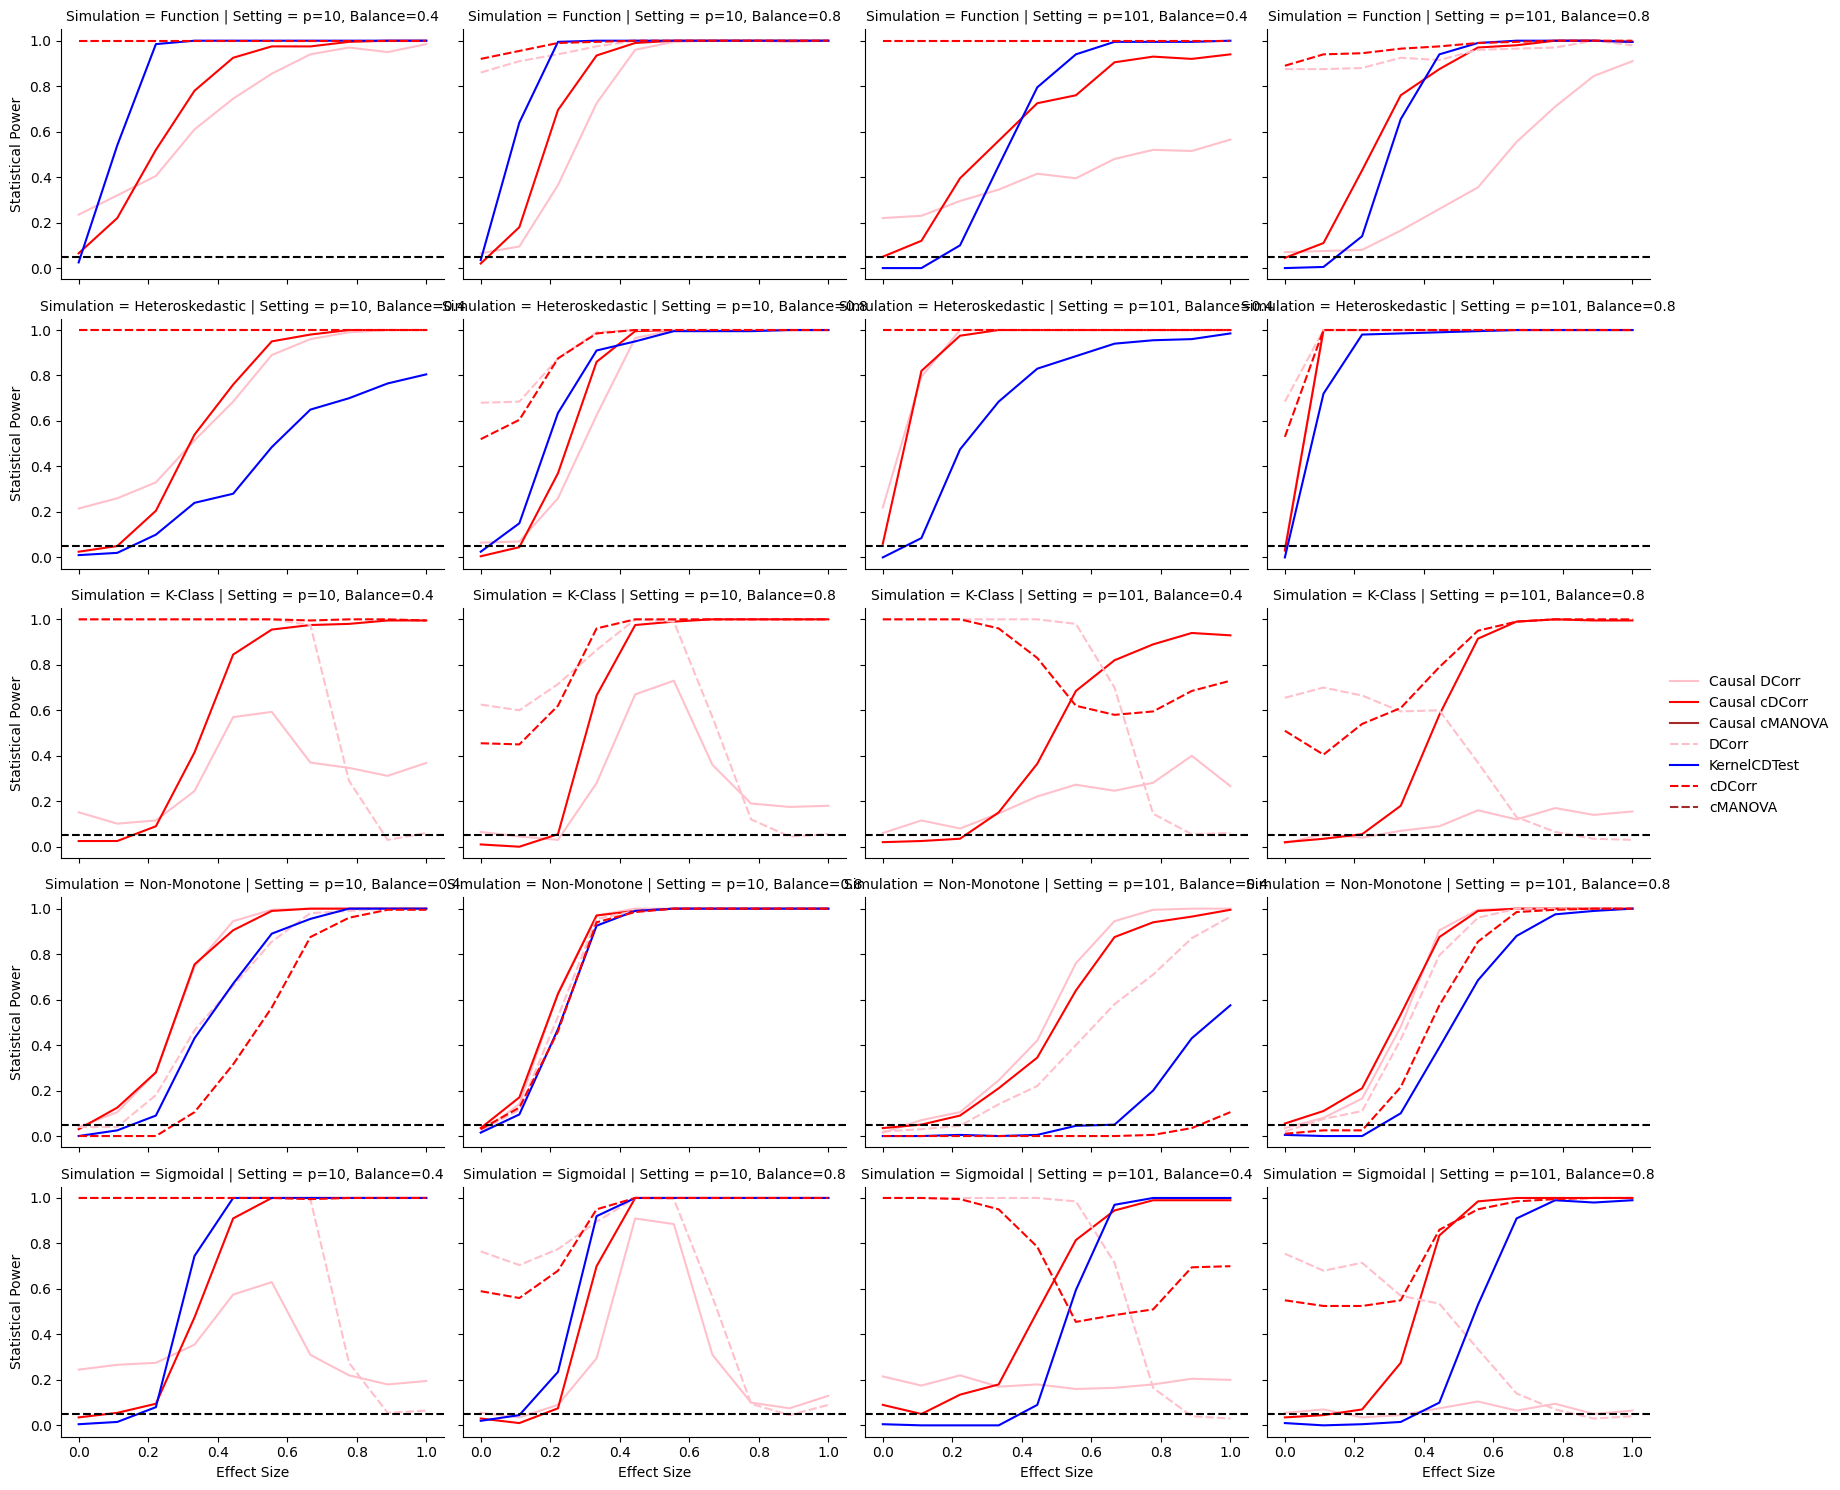

In [24]:
g = sns.FacetGrid(sim_powers, col="Setting", row="Simulation", aspect=1.4)
palette={"Causal cDCorr" : "red", "cDCorr" : "red",
         "Causal DCorr": "pink", "DCorr": "pink",
         "Causal KernelCDTest" : "blue", "KernelCDTest": "blue",
         "Causal cMANOVA": "brown", "cMANOVA": "brown",
         "RCIT": "green", "Causal RCIT": "green",
         "RCoT": "purple", "Causal RCoT": "purple",
         "GCM": "orange", "Causal GCM": "orange"}

linestyles={"Causal cDCorr" : "", "cDCorr" : (4, 1.5),
         "Causal DCorr": "", "DCorr": (4, 1.5),
         "Causal KernelCDTest" : "", "KernelCDTest": "",
         "Causal cMANOVA": "", "cMANOVA": (4, 1.5),
         "Causal RCIT": "", "RCIT": (4, 1.5),
         "Causal RCoT": "", "RCoT": (4, 1.5),
         "Causal GCM": "", "GCM": (4, 1.5)}
g.map_dataframe(sns.lineplot, x="Effect Size", y="Statistical Power", hue="Statistic", palette=palette, 
                style="Statistic", dashes=linestyles)
g.map(plt.axhline, y=alpha, ls="--", c="black")
g.add_legend();

# CATE

In [155]:
#func = pd.read_pickle("./data/sim_results_covarfixed_cate_fn.pkl")
hetero = pd.read_pickle("./data/sim_results_covarfixed_cate_hetero.pkl")
kcl = pd.read_pickle("./data/sim_results_covarfixed_cate_kclass.pkl")
nm = pd.read_pickle("./data/sim_results_covarfixed_cate_nm.pkl")
sig = pd.read_pickle("./data/sim_results_covarfixed_cate_sig.pkl")
hetero

,Simulation,#Samples,Dimensionality,Balance,Effect Size,i,cMANOVA,KernelCDTest,WGCM,RCoT,RCIT,cDCorr,DCorr,Causal cMANOVA,Causal KernelCDTest,Causal WGCM,Causal RCoT,Causal RCIT,Causal cDCorr,Causal DCorr
0,Heteroskedastic,100,10,0.4,0.0,0,0.355404,0.337662,0.018981,0.011,0.160,0.000999,3.859071e-11,0.060197,0.952048,0.003996,0.719,0.133,0.106893,4.305858e-03
1,Heteroskedastic,100,10,0.4,0.0,1,0.572896,0.585415,0.641359,0.246,0.753,0.000999,1.356302e-11,0.948730,0.640360,0.726274,0.963,0.455,0.859141,5.844573e-01
2,Heteroskedastic,100,10,0.4,0.0,2,0.131132,0.307692,0.486513,0.742,0.985,0.001998,8.011525e-11,0.469560,0.488511,0.707293,0.266,0.395,0.479520,6.133418e-01
3,Heteroskedastic,100,10,0.4,0.0,3,0.190458,0.381618,0.871129,0.957,0.113,0.000999,5.490108e-09,0.511051,0.242757,0.958042,0.490,0.465,0.538462,1.971422e-01
4,Heteroskedastic,100,10,0.4,0.0,4,0.501614,0.651349,0.956044,0.857,0.387,0.000999,5.116984e-13,0.747074,0.260739,0.887113,0.269,0.384,0.854146,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Heteroskedastic,100,101,0.8,1.0,195,NaN,0.000999,0.106893,0.000,0.000,0.000999,3.665800e-17,NaN,1.000000,0.052947,0.000,0.000,0.000999,2.805375e-14
7996,Heteroskedastic,100,101,0.8,1.0,196,NaN,0.000999,0.551449,0.025,0.000,0.000999,3.011608e-17,NaN,0.924076,0.413586,0.000,0.000,0.000999,1.557891e-14
7997,Heteroskedastic,100,101,0.8,1.0,197,NaN,0.000999,0.435564,0.000,0.000,0.000999,3.295899e-17,NaN,0.872128,0.640360,0.000,0.000,0.000999,2.148326e-14
7998,Heteroskedastic,100,101,0.8,1.0,198,NaN,0.000999,0.347652,0.000,0.000,0.000999,2.453089e-17,NaN,0.407592,0.532468,0.000,0.000,0.000999,8.076711e-15


In [156]:
alpha = .05

sim_pvals = pd.concat([sig, hetero, nm, kcl], axis=0)
sim_pvals.rename(columns = {"WGCM": "GCM", "Causal WGCM": "Causal GCM"}, inplace=True)

sim_pvals_long = pd.melt(sim_pvals, id_vars=["Simulation", "#Samples", "Dimensionality", "Balance", "Effect Size", "i"],
                        value_vars=["cMANOVA", "KernelCDTest", "cDCorr", "DCorr", "Causal cMANOVA", "Causal KernelCDTest", "Causal cDCorr", "Causal DCorr",
                                    "RCIT", "Causal RCIT", "RCoT", "Causal RCoT", "GCM", "Causal GCM"],
                        var_name="Statistic", value_name="p-value")

excl_statlist = ["Causal cMANOVA", "Causal DCorr", "Causal RCIT", "Causal RCoT", "Causal GCM", "Causal KernelCDTest"]

sim_pvals_long = sim_pvals_long[~sim_pvals_long["Statistic"].isin(excl_statlist)]

sim_pvals_long["p-value"] = sim_pvals_long["p-value"].fillna(np.nan)
sim_pvals_long["Statistical Power"] = np.where(~np.isnan(sim_pvals_long["p-value"]),
                                     (sim_pvals_long["p-value"] < alpha).astype(float), 
                                     np.nan)
#sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("CoDITE", "KernelCDTest")
#sim_pvals_long["Statistic"] = sim_pvals_long["Statistic"].replace("Causal CoDITE", "Causal KernelCDTest")
sim_pvals_long.tail()

,Simulation,#Samples,Dimensionality,Balance,Effect Size,i,Statistic,p-value,Statistical Power
447995,K-Class,100,101,0.8,1.0,195,GCM,0.239760,0.0
447996,K-Class,100,101,0.8,1.0,196,GCM,0.660340,0.0
447997,K-Class,100,101,0.8,1.0,197,GCM,0.743257,0.0
447998,K-Class,100,101,0.8,1.0,198,GCM,0.775225,0.0
447999,K-Class,100,101,0.8,1.0,199,GCM,0.472527,0.0


In [157]:
sim_pvals_long["Setting"] = "p=" + sim_pvals_long["Dimensionality"].astype(str) + ", Balance=" + sim_pvals_long["Balance"].astype(str)
sim_pvals_long

,Simulation,#Samples,Dimensionality,Balance,Effect Size,i,Statistic,p-value,Statistical Power,Setting
0,Sigmoidal,100,10,0.4,0.0,0,cMANOVA,0.722988,0.0,"p=10, Balance=0.4"
1,Sigmoidal,100,10,0.4,0.0,1,cMANOVA,0.838348,0.0,"p=10, Balance=0.4"
2,Sigmoidal,100,10,0.4,0.0,2,cMANOVA,0.599703,0.0,"p=10, Balance=0.4"
3,Sigmoidal,100,10,0.4,0.0,3,cMANOVA,0.793766,0.0,"p=10, Balance=0.4"
4,Sigmoidal,100,10,0.4,0.0,4,cMANOVA,0.057101,0.0,"p=10, Balance=0.4"
...,...,...,...,...,...,...,...,...,...,...
447995,K-Class,100,101,0.8,1.0,195,GCM,0.239760,0.0,"p=101, Balance=0.8"
447996,K-Class,100,101,0.8,1.0,196,GCM,0.660340,0.0,"p=101, Balance=0.8"
447997,K-Class,100,101,0.8,1.0,197,GCM,0.743257,0.0,"p=101, Balance=0.8"
447998,K-Class,100,101,0.8,1.0,198,GCM,0.775225,0.0,"p=101, Balance=0.8"


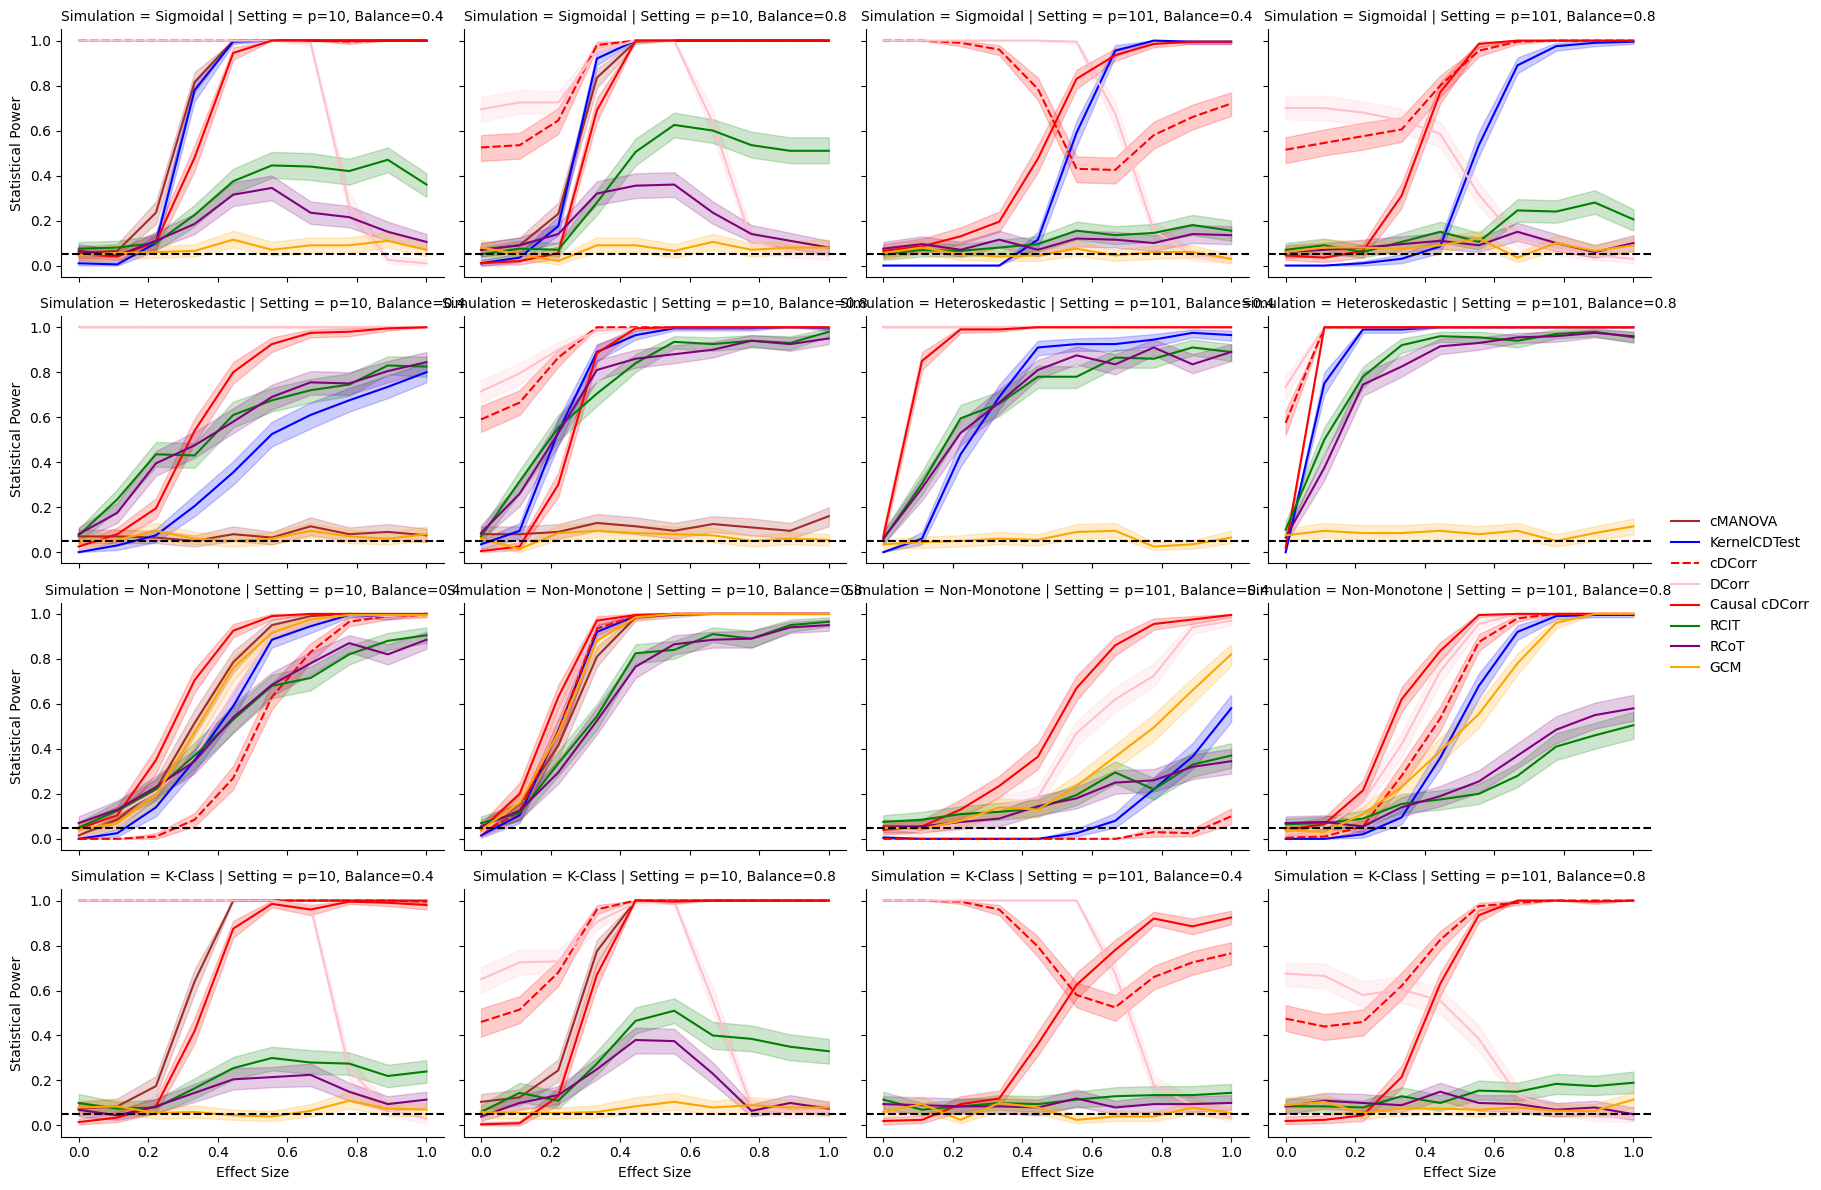

In [158]:
g = sns.FacetGrid(sim_pvals_long, col="Setting", row="Simulation", aspect=1.4)
palette={"Causal cDCorr" : "red", "cDCorr" : "red",
         "Causal DCorr": "pink", "DCorr": "pink",
         "Causal KernelCDTest" : "blue", "KernelCDTest": "blue",
         "Causal cMANOVA": "brown", "cMANOVA": "brown",
         "RCIT": "green", "Causal RCIT": "green",
         "RCoT": "purple", "Causal RCoT": "purple",
         "GCM": "orange", "Causal GCM": "orange"}

linestyles={"Causal cDCorr" : "", "cDCorr" : (4, 1.5),
         "Causal DCorr": "", "DCorr": "",#(4, 1.5),
         "Causal KernelCDTest" : "", "KernelCDTest": "",
         "Causal cMANOVA": "", "cMANOVA":  "",#(4, 1.5),
         "Causal RCIT": "", "RCIT":  "",#(4, 1.5),
         "Causal RCoT": "", "RCoT":  "",#(4, 1.5),
         "Causal GCM": "", "GCM":  ""}#(4, 1.5)}

g.map_dataframe(sns.lineplot, x="Effect Size", y="Statistical Power", hue="Statistic", palette=palette, 
                style="Statistic", dashes=linestyles, errorbar=("ci", 95))
g.map(plt.axhline, y=alpha, ls="--", c="black")
g.add_legend();

In [125]:
g.savefig("./Figures/power_unmod.pdf")

## Null Simulations

In [9]:
#func = pd.read_pickle("./data/sim_results_covarfixed_cate_fn.pkl")
hetero = pd.read_pickle("./data/sim_results_null_cate_hetero.pkl")
kcl = pd.read_pickle("./data/sim_results_null_cate_kclass.pkl")
nm = pd.read_pickle("./data/sim_results_null_cate_nm.pkl")
sig = pd.read_pickle("./data/sim_results_null_cate_sig.pkl")
hetero

,Simulation,#Samples,Dimensionality,Balance,Effect Size,i,cMANOVA,KernelCDTest,GCM,RCoT,RCIT,cDCorr,DCorr,Causal cMANOVA,Causal KernelCDTest,Causal GCM,Causal RCoT,Causal RCIT,Causal cDCorr,Causal DCorr
0,Heteroskedastic,100,10,1.0,0,0,0.469520,0.673327,0.666334,0.429,0.809,0.815185,1.000000e+00,0.469240,0.170829,0.599401,0.033,0.156,0.750250,0.783789
1,Heteroskedastic,100,10,1.0,0,1,0.563388,0.671329,0.507493,0.687,0.600,0.160839,6.098727e-02,0.690772,0.669331,0.718282,0.282,0.924,0.493506,0.239518
2,Heteroskedastic,100,10,1.0,0,2,0.452523,0.690310,0.267732,0.740,0.568,0.865135,1.000000e+00,0.657908,0.861139,0.210789,0.944,0.258,0.925075,1.000000
3,Heteroskedastic,100,10,1.0,0,3,0.651806,0.980020,0.013986,0.867,0.049,0.626374,4.776797e-01,0.626235,0.972028,0.020979,0.568,0.524,0.588412,0.661939
4,Heteroskedastic,100,10,1.0,0,4,0.444761,0.391608,0.943057,0.795,0.753,0.293706,6.610858e-01,0.383697,0.539461,0.579421,0.330,0.000,0.462537,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Heteroskedastic,100,101,0.2,0,95,NaN,0.853147,0.535465,0.301,0.120,0.000999,3.486599e-17,NaN,0.867133,NaN,0.639,0.066,0.658342,0.319250
3996,Heteroskedastic,100,101,0.2,0,96,NaN,0.531469,0.386613,0.509,0.944,0.000999,6.494036e-17,NaN,0.002997,NaN,0.334,0.451,0.280719,0.369301
3997,Heteroskedastic,100,101,0.2,0,97,NaN,0.533467,0.352647,0.551,0.578,0.000999,1.767970e-15,NaN,0.853147,0.148851,0.749,0.050,0.474525,0.348010
3998,Heteroskedastic,100,101,0.2,0,98,NaN,0.483516,0.100899,0.400,0.993,0.000999,3.966965e-14,NaN,0.735265,NaN,0.132,0.384,0.530470,0.524260


In [10]:
alpha = .05

sim_pvals = pd.concat([sig, hetero, nm, kcl], axis=0)
sim_pvals.rename(columns = {"WGCM": "GCM", "Causal WGCM": "Causal GCM"}, inplace=True)

sim_pvals_long = pd.melt(sim_pvals, id_vars=["Simulation", "#Samples", "Dimensionality", "Balance", "Effect Size", "i"],
                        value_vars=["cMANOVA", "KernelCDTest", "cDCorr", "DCorr", "Causal cMANOVA", "Causal KernelCDTest", "Causal cDCorr", "Causal DCorr",
                                    "RCIT", "Causal RCIT", "RCoT", "Causal RCoT", "GCM", "Causal GCM"],
                        var_name="Statistic", value_name="p-value")

excl_statlist = ["Causal cMANOVA", "Causal DCorr", "DCorr", "Causal RCIT", "Causal RCoT", "Causal GCM", "Causal KernelCDTest"]

sim_pvals_long = sim_pvals_long[~sim_pvals_long["Statistic"].isin(excl_statlist)]

sim_pvals_long["p-value"] = sim_pvals_long["p-value"].fillna(np.nan)
sim_pvals_long["Statistical Power"] = np.where(~np.isnan(sim_pvals_long["p-value"]),
                                     (sim_pvals_long["p-value"] < alpha).astype(float), 
                                     np.nan)

sim_pvals_long.tail()

,Simulation,#Samples,Dimensionality,Balance,Effect Size,i,Statistic,p-value,Statistical Power
207995,K-Class,100,101,0.2,0,95,GCM,0.317682,0.0
207996,K-Class,100,101,0.2,0,96,GCM,0.815185,0.0
207997,K-Class,100,101,0.2,0,97,GCM,0.211788,0.0
207998,K-Class,100,101,0.2,0,98,GCM,0.356643,0.0
207999,K-Class,100,101,0.2,0,99,GCM,0.529471,0.0


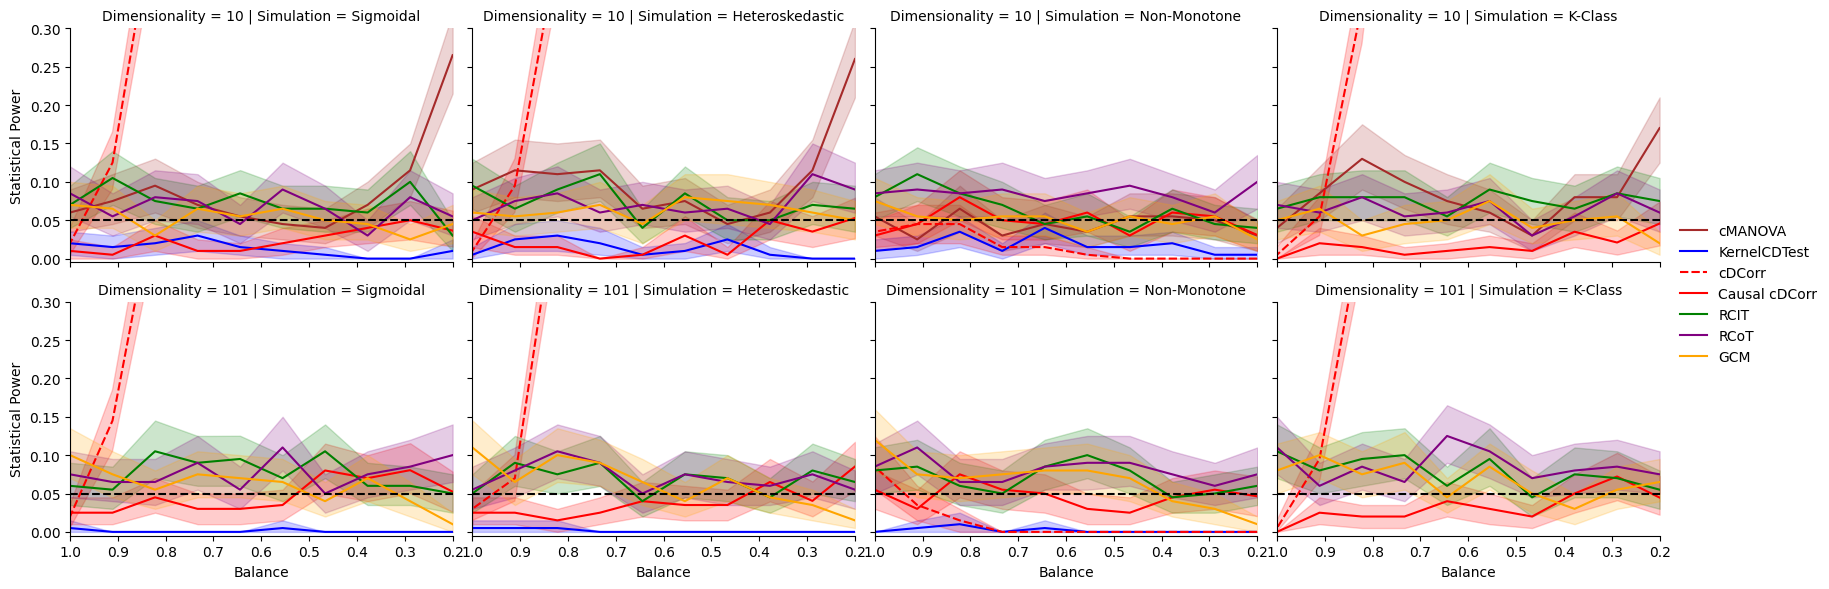

In [14]:
g = sns.FacetGrid(sim_pvals_long, col="Simulation", row="Dimensionality", aspect=1.4)
palette={"Causal cDCorr" : "red", "cDCorr" : "red",
         "Causal DCorr": "pink", "DCorr": "pink",
         "Causal KernelCDTest" : "blue", "KernelCDTest": "blue",
         "Causal cMANOVA": "brown", "cMANOVA": "brown",
         "RCIT": "green", "Causal RCIT": "green",
         "RCoT": "purple", "Causal RCoT": "purple",
         "GCM": "orange", "Causal GCM": "orange"}

linestyles={"Causal cDCorr" : "", "cDCorr" : (4, 1.5),
         "Causal DCorr": "", "DCorr": (4, 1.5),
         "Causal KernelCDTest" : "", "KernelCDTest": "",
         "Causal cMANOVA": "", "cMANOVA":  "",#(4, 1.5),
         "Causal RCIT": "", "RCIT": "",#(4, 1.5),
         "Causal RCoT": "", "RCoT": "",# (4, 1.5),
         "Causal GCM": "", "GCM": ""}#(4, 1.5)}

g.map_dataframe(sns.lineplot, x="Balance", y="Statistical Power", hue="Statistic", palette=palette, 
                style="Statistic", dashes=linestyles, errorbar=("ci", 90))
g.map(plt.axhline, y=alpha, ls="--", c="black")
for ax in g.axes.ravel():
    ax.set_xlim((1, 0.2))
    ax.set_ylim((-.005, 0.3))
g.add_legend();

In [153]:
g.savefig("./Figures/validity_unmod.pdf")

In [16]:
sim_pvals_long["Std. Err"] = sim_pvals_long["Statistical Power"]
sim_powers = sim_pvals_long[~pd.isna(sim_pvals_long["p-value"])].groupby(
    ["Simulation", "Dimensionality", "Balance", "Effect Size", "Statistic"]
).agg({"Statistical Power" : np.mean, "Std. Err": lambda x: x.std()/np.sqrt(len(x))}).reset_index()

sim_powers["Validity"] = sim_powers["Statistical Power"] - 1.645*sim_powers["Std. Err"] < alpha
print(sim_powers)
sim_powers.groupby(["Statistic", "Simulation", "Dimensionality"]).agg({"Validity": np.sum, "Statistic": lambda x: len(x)})

          Simulation  Dimensionality  Balance  Effect Size      Statistic  \
0    Heteroskedastic              10      0.2            0  Causal cDCorr   
1    Heteroskedastic              10      0.2            0            GCM   
2    Heteroskedastic              10      0.2            0   KernelCDTest   
3    Heteroskedastic              10      0.2            0           RCIT   
4    Heteroskedastic              10      0.2            0           RCoT   
..               ...             ...      ...          ...            ...   
495        Sigmoidal             101      1.0            0            GCM   
496        Sigmoidal             101      1.0            0   KernelCDTest   
497        Sigmoidal             101      1.0            0           RCIT   
498        Sigmoidal             101      1.0            0           RCoT   
499        Sigmoidal             101      1.0            0         cDCorr   

     Statistical Power  Std. Err  Validity  
0              0.05291  0.0163

Validity  Statistic
Statistic     Simulation      Dimensionality                     
Causal cDCorr Heteroskedastic 10                    10         10
                              101                    9         10
              K-Class         10                    10         10
                              101                   10         10
              Non-Monotone    10                    10         10
                              101                   10         10
              Sigmoidal       10                    10         10
                              101                   10         10
GCM           Heteroskedastic 10                    10         10
                              101                    7         10
              K-Class         10                    10         10
                              101                    7         10
              Non-Monotone    10                    10         10
                              101                    9         10
              Sigmoidal       10                    10         10
                              101                    9         10
KernelCDTest  Heteroskedastic 10                    10         10
                              101                   10         10
              Non-Monotone    10                    10         10
                              101                   10         10
              Sigmoidal       10                    10         10
                              101                   10         10
RCIT          Heteroskedastic 10                     6         10
                              101                    8         10
              K-Class         10                     8         10
                              101                    6         10
              Non-Monotone    10                     8         10
                              101                    7         10
              Sigmoidal       10                     7         10
                              101                    6         10
RCoT          Heteroskedastic 10                     7         10
                              101                    8         10
              K-Class         10                     9         10
                              101                    5         10
              Non-Monotone    10                     3         10
                              101                    5         10
              Sigmoidal       10                     8         10
                              101                    6         10
cDCorr        Heteroskedastic 10                     1         10
                              101                    2         10
              K-Class         10                     2         10
                              101                    1         10
              Non-Monotone    10                    10         10
                              101                    9         10
              Sigmoidal       10                     1         10
                              101                    1         10
cMANOVA       Heteroskedastic 10                     4         10
              K-Class         10                     6         10
              Non-Monotone    10                    10         10
              Sigmoidal       10                     7         10